# Data Handling (Import pandas library)

In [5]:
import pandas as pd


## Load the dataset of Income Classification 

In [6]:
train_data = pd.read_csv("train_data.csv")
validation_data = pd.read_csv("validation_data.csv")


## Inspect the data

In [7]:
train_data.head()


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,28,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Poland,>50K
1,53,Private,HS-grad,9,Divorced,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<=50K
2,32,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,49,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,1977,50,South,>50K
4,30,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K


In [8]:
validation_data.head()


,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,41,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,>50K
1,33,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
2,28,Private,10th,6,Divorced,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,47,Private,Assoc-acdm,12,Widowed,Other-service,Own-child,White,Female,0,0,35,United-States,<=50K
4,25,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K


## To check the dataset Structure 

In [9]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11208 entries, 0 to 11207
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              11208 non-null  int64 
 1   workclass        11208 non-null  object
 2   education        11208 non-null  object
 3   educational-num  11208 non-null  int64 
 4   marital-status   11208 non-null  object
 5   occupation       11208 non-null  object
 6   relationship     11208 non-null  object
 7   race             11208 non-null  object
 8   gender           11208 non-null  object
 9   capital-gain     11208 non-null  int64 
 10  capital-loss     11208 non-null  int64 
 11  hours-per-week   11208 non-null  int64 
 12  native-country   11208 non-null  object
 13  income           11208 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.2+ MB


In [10]:
validation_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              2240 non-null   int64 
 1   workclass        2240 non-null   object
 2   education        2240 non-null   object
 3   educational-num  2240 non-null   int64 
 4   marital-status   2240 non-null   object
 5   occupation       2240 non-null   object
 6   relationship     2240 non-null   object
 7   race             2240 non-null   object
 8   gender           2240 non-null   object
 9   capital-gain     2240 non-null   int64 
 10  capital-loss     2240 non-null   int64 
 11  hours-per-week   2240 non-null   int64 
 12  native-country   2240 non-null   object
 13  income           2240 non-null   object
dtypes: int64(5), object(9)
memory usage: 245.1+ KB


## Target Variable Distribution

In [11]:
train_data["income"].value_counts()


income
>50K     5604
<=50K    5604
Name: count, dtype: int64

## Target Variable Distribution (Validation)


In [12]:
validation_data["income"].value_counts()


income
>50K     1120
<=50K    1120
Name: count, dtype: int64

## Visualtization class Distribution

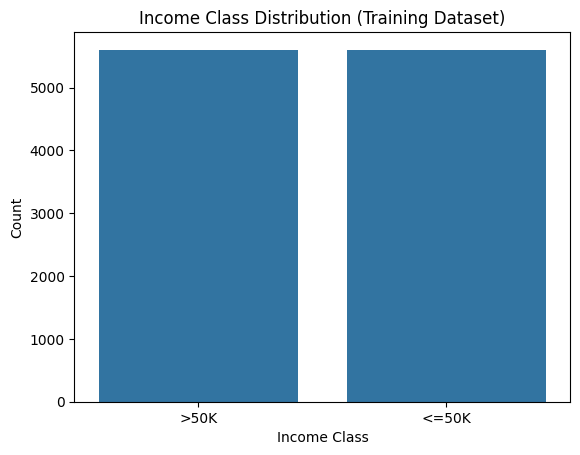

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure()
sns.countplot(x="income", data=train_data)
plt.title("Income Class Distribution (Training Dataset)")
plt.xlabel("Income Class")
plt.ylabel("Count")
plt.show()


# Feature-Target Separation

## Separate Features and Target (Target Data)

In [14]:
X_train = train_data.drop("income", axis=1)

y_train = train_data["income"]


## Separate Features and Target (Validation Data)

In [15]:
X_val = validation_data.drop("income", axis=1)
y_val = validation_data["income"]


## Dataset shape 

In [16]:
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)



Training Data Shape: (11208, 13)
Validation Data Shape: (2240, 13)


# Target Label Encoding 

## Encode Income Labels 

In [17]:
y_train = y_train.map({"<=50K": 0, ">50K": 1})
y_val = y_val.map({"<=50K": 0, ">50K": 1})


In [18]:
print("Training Label Distribution:")
print(y_train.value_counts())

print("\nValidation Label Distribution:")
print(y_val.value_counts())


Training Label Distribution:
income
1    5604
0    5604
Name: count, dtype: int64

Validation Label Distribution:
income
1    1120
0    1120
Name: count, dtype: int64


# Identify feature Types 

## Identify Categorical and Numercial Features 

In [19]:
categorical_features = X_train.select_dtypes(include=["object"]).columns
numerical_features = X_train.select_dtypes(include=["int64"]).columns


## Output of indetified features 

In [20]:
print("Categorical Features:")
print(categorical_features)

print("\nNumerical Features:")
print(numerical_features)


Categorical Features:
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')

Numerical Features:
Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


# Feature Preprocessing Pipeline 

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [22]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numerical_features)
    ]
)


## Fit and Transform Training Data

In [23]:
# fit and transform training data

X_train_processed = preprocessor.fit_transform(X_train)


In [24]:
# transform validation data 
X_val_processed = preprocessor.transform(X_val)



## To verify transformed features shapes 

In [25]:
print("Processed Training Data Shape:", X_train_processed.shape)
print("Processed Validation Data Shape:", X_val_processed.shape)


Processed Training Data Shape: (11208, 101)
Processed Validation Data Shape: (2240, 101)


## Model Training 

### Logistic Regression Model 

In [26]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)


### Training the model

In [27]:
logistic_model.fit(X_train_processed, y_train)


LogisticRegression(max_iter=1000)

In [28]:
y_pred_lr = logistic_model.predict(X_val_processed)
y_prob_lr = logistic_model.predict_proba(X_val_processed)[:, 1]


### Classification report 

In [29]:
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report:")
print(classification_report(y_val, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1120
           1       0.80      0.82      0.81      1120

    accuracy                           0.81      2240
   macro avg       0.81      0.81      0.81      2240
weighted avg       0.81      0.81      0.81      2240



# Confusion Matrix (Heatmap Visualization)

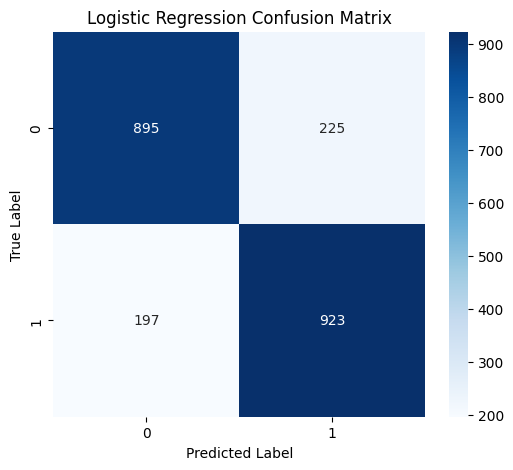

In [31]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm_lr = confusion_matrix(y_val, y_pred_lr)


plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Blues",
    cbar=True
)

plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## ROC-AUC curve Score 

In [38]:
from sklearn.metrics import roc_auc_score

lr_roc_auc = roc_auc_score(y_val, y_prob_lr)
print("Logistic Regression ROC-AUC:", lr_roc_auc)


Logistic Regression ROC-AUC: 0.893922193877551


## ROC curve Visualization 

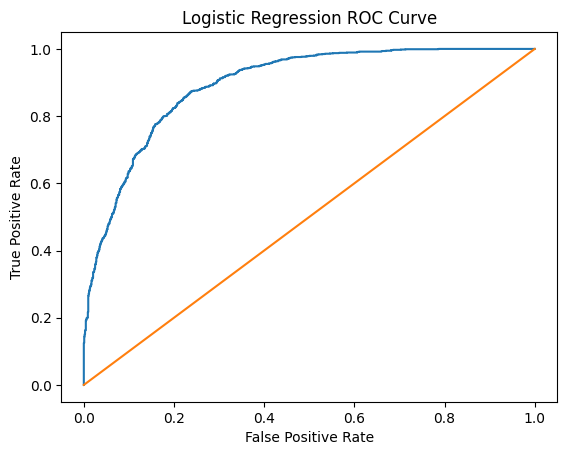

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_val, y_prob_lr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()


# Support Vector Machine (SVM) Training and Evaluation

In [41]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)


## Training Model

In [42]:
svm_model.fit(X_train_processed, y_train)


SVC(probability=True)

In [43]:
y_pred_svm = svm_model.predict(X_val_processed)
y_prob_svm = svm_model.predict_proba(X_val_processed)[:, 1]


## Classification Report 

In [44]:
from sklearn.metrics import classification_report

print("SVM Classification Report:")
print(classification_report(y_val, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1120
           1       0.79      0.84      0.82      1120

    accuracy                           0.81      2240
   macro avg       0.81      0.81      0.81      2240
weighted avg       0.81      0.81      0.81      2240



## Confusion Matrix Heatmap (SVM)

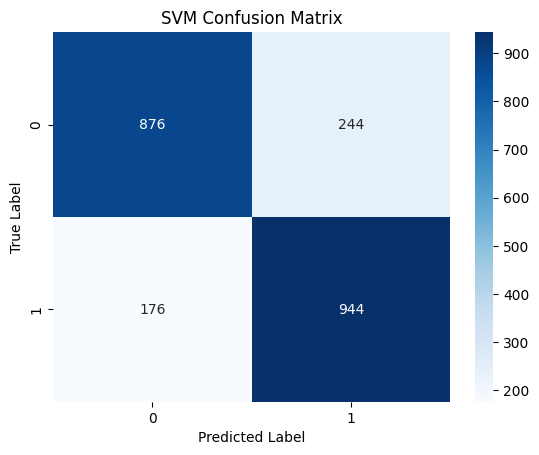

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_svm = confusion_matrix(y_val, y_pred_svm)

plt.figure()
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## ROC-AUC Score (SVM)

In [49]:
from sklearn.metrics import roc_auc_score

svm_roc_auc = roc_auc_score(y_val, y_prob_svm)
print("SVM ROC-AUC:", svm_roc_auc)


SVM ROC-AUC: 0.8928527582908163


## ROC Curve (SVM) Visualization

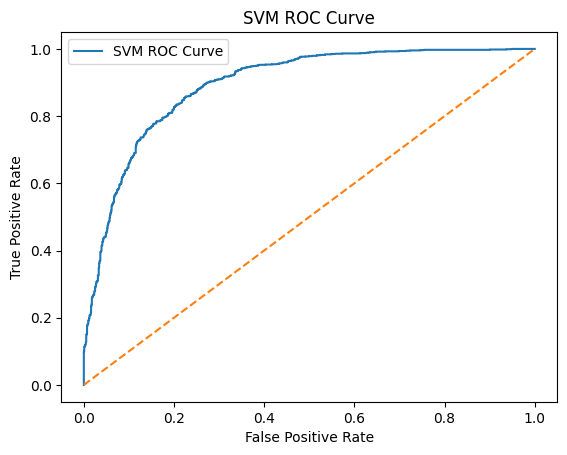

In [64]:
from sklearn.metrics import roc_curve

fpr_svm, tpr_svm, _ = roc_curve(y_val, y_prob_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, label="SVM ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()


# Random Forest Training and Evaluation

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)


In [52]:
rf_model.fit(X_train_processed, y_train)


RandomForestClassifier(random_state=42)

In [53]:
y_pred_rf = rf_model.predict(X_val_processed)
y_prob_rf = rf_model.predict_proba(X_val_processed)[:, 1]


In [54]:
from sklearn.metrics import classification_report

print("Random Forest Classification Report:")
print(classification_report(y_val, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1120
           1       0.79      0.81      0.80      1120

    accuracy                           0.80      2240
   macro avg       0.80      0.80      0.80      2240
weighted avg       0.80      0.80      0.80      2240



## Confusion Matrix Heatmap (Random Forest)

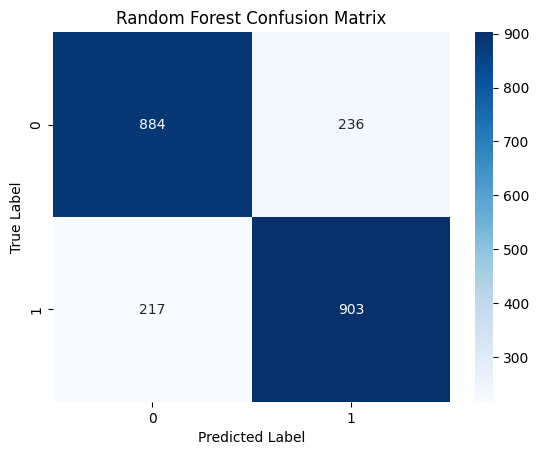

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_val, y_pred_rf)

plt.figure()
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## ROC-AUC Score (Random Forest)

In [56]:
from sklearn.metrics import roc_auc_score

rf_roc_auc = roc_auc_score(y_val, y_prob_rf)
print("Random Forest ROC-AUC:", rf_roc_auc)


Random Forest ROC-AUC: 0.8836941964285714


## ROC Curve (Random Forest)

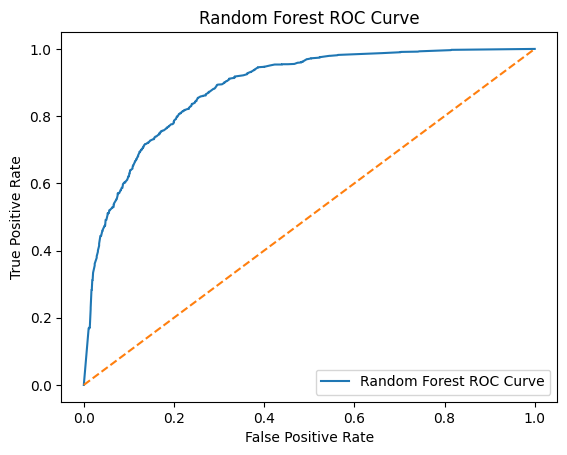

In [57]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)

plt.figure()
plt.plot(fpr_rf, tpr_rf, label="Random Forest ROC Curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()


# Model Performance Comparison Table 

In [58]:
import pandas as pd

comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Support Vector Machine", "Random Forest"],
    "Accuracy": [0.81, 0.81, 0.80],
    "ROC–AUC": [0.8939, 0.8929, 0.8837]
})

comparison_df


,Model,Accuracy,ROC–AUC
0,Logistic Regression,0.81,0.8939
1,Support Vector Machine,0.81,0.8929
2,Random Forest,0.80,0.8837


# Accuracy Comparison Bar Chart 

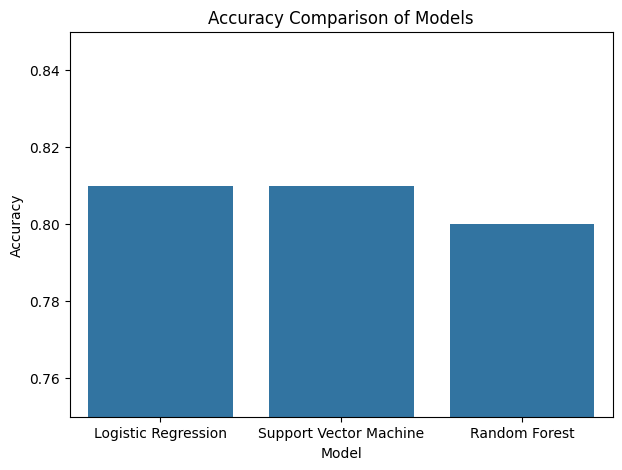

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.barplot(
    x="Model",
    y="Accuracy",
    data=comparison_df
)

plt.title("Accuracy Comparison of Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.ylim(0.75, 0.85)
plt.show()


## ROC-AUC Comparison Bar Chart 

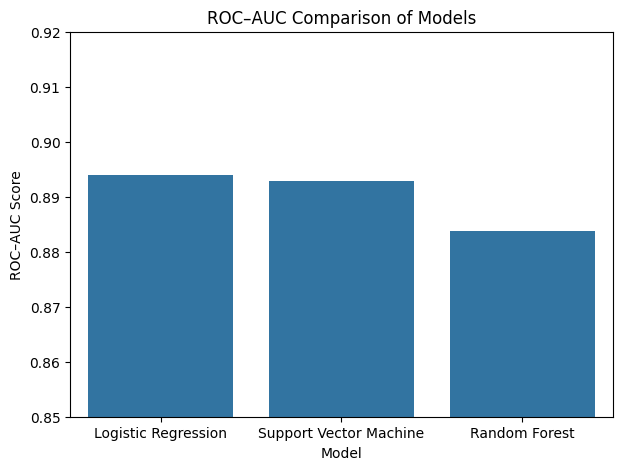

In [60]:
plt.figure(figsize=(7, 5))
sns.barplot(
    x="Model",
    y="ROC–AUC",
    data=comparison_df
)

plt.title("ROC–AUC Comparison of Models")
plt.ylabel("ROC–AUC Score")
plt.xlabel("Model")
plt.ylim(0.85, 0.92)
plt.show()


### Combined ROC Curve (Line Graph)

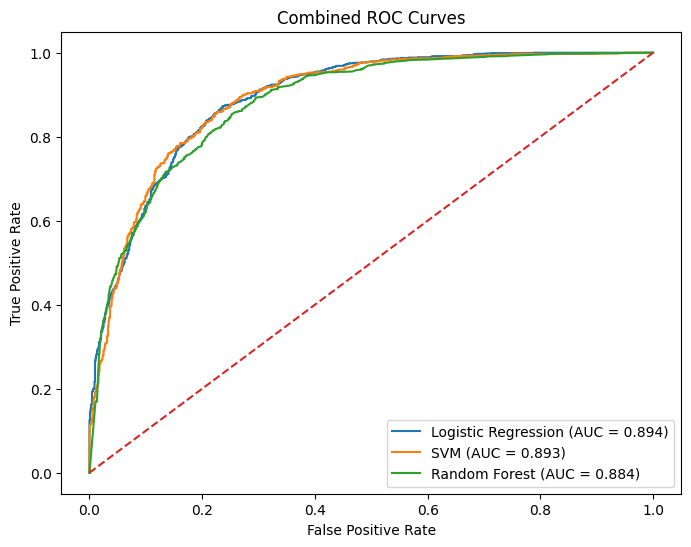

In [61]:
from sklearn.metrics import roc_curve

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_val, y_prob_lr)

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_prob_svm)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)

plt.figure(figsize=(8, 6))

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC = 0.894)")
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = 0.893)")
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = 0.884)")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Combined ROC Curves")
plt.legend()
plt.show()
